<a href="https://colab.research.google.com/github/Adhithyaram29D/mnist-classification/blob/main/Deep_EX03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[482]
single_image.shape

(28, 28)

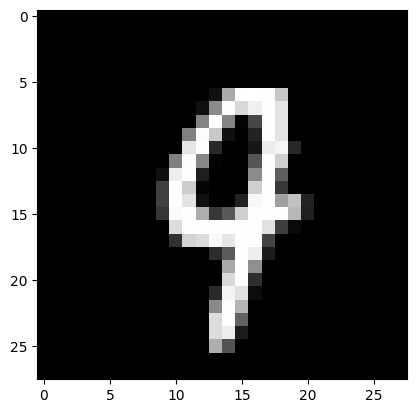

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()

0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

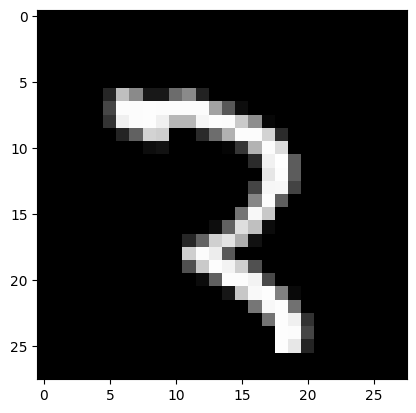

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(7,7), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(3,3)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(X_train_scaled,y_train_onehot,epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 [==============================] - 30s 31ms/step - loss: 0.4478 - accuracy: 0.8599 - val_loss: 0.1521 - val_accuracy: 0.9566
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.1360 - accuracy: 0.9637 - val_loss: 0.0982 - val_accuracy: 0.9718
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0942 - accuracy: 0.9738 - val_loss: 0.0882 - val_accuracy: 0.9730
Epoch 4/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0741 - accuracy: 0.9794 - val_loss: 0.0895 - val_accuracy: 0.9736
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0532 - val_accuracy: 0.9826


In [24]:
metrics = pd.DataFrame(model.history.history)

In [25]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.447816,0.859917,0.152149,0.9566
1,0.135984,0.963700,0.098213,0.9718
2,0.094183,0.973783,0.088167,0.9730
3,0.074147,0.979417,0.089533,0.9736
4,0.056776,0.983367,0.053233,0.9826


ADHITHYARAM D 
21222230008


<Axes: >

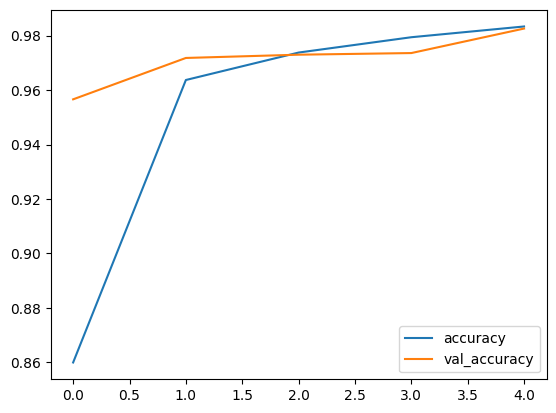

In [26]:
print("ADHITHYARAM D \n21222230008")
metrics[['accuracy','val_accuracy']].plot()

ADHITHYARAM D 
21222230008


<Axes: >

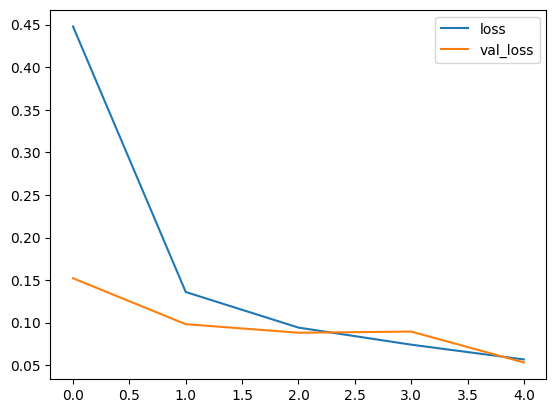

In [27]:
print("ADHITHYARAM D \n21222230008")
metrics[['loss','val_loss']].plot()

In [28]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [29]:
print("ADHITHYARAM D \n21222230008")
print(confusion_matrix(y_test,x_test_predictions))

ADHITHYARAM D 
21222230008
[[ 970    0    2    0    0    0    4    3    1    0]
 [   0 1130    1    1    0    1    1    0    1    0]
 [   7    2 1002    3    4    0    0    7    7    0]
 [   0    0    4  990    0    6    0    3    7    0]
 [   0    1    0    0  971    0    0    1    0    9]
 [   1    5    0    7    0  872    7    0    0    0]
 [   7    3    0    0    3    2  943    0    0    0]
 [   1    3    7    1    2    0    0 1007    3    4]
 [   5    1    3    0    1    2    0    2  957    3]
 [   4    3    1    0    3    2    0    4    8  984]]


In [30]:
print("ADHITHYARAM D \n21222230008")
print(classification_report(y_test,x_test_predictions))

ADHITHYARAM D 
21222230008
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [31]:
img = image.load_img('img.jpg')

In [32]:
type(img)

PIL.Image.Image

In [33]:
img = image.load_img('img.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [34]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [35]:
print("ADHITHYARAM D \n21222230008")
print(x_single_prediction)

ADHITHYARAM D 
21222230008
[5]


ADHITHYARAM D 
21222230008


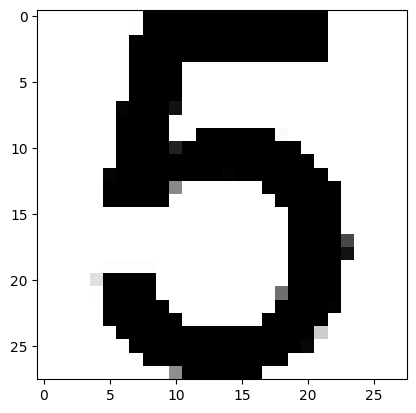

In [36]:
print("ADHITHYARAM D \n21222230008")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [37]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [38]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [39]:
print("ADHITHYARAM D \n21222230008")
print(x_single_prediction)

ADHITHYARAM D 
21222230008
[5]
